![Doordash](https://raw.githubusercontent.com/interviewquery/takehomes/doordash_1/doordash_1/logo.png)
# Overview



1. Building​ ​a​ ​machine​ ​learning​ model​ ​ ​for​ ​a​ ​prediction ​ task​ 
2. Writing ​ an​ ​ application​ ​ to​ ​ make​ ​ ​predictions ​ using​ ​ ​that​ ​model.

**NOTE:** For​ this part, you must use a production ready language like
Python. Thus, please do not use R.

# Problem ​Description 

When​ a​ ​consumer​ ​places​ ​an​ ​order​ ​on​ DoorDash,​​ we​ ​ show​ ​ the​ ​ ​expected ​
​time of​​ ​delivery.​ ​It​ ​is​ ​very ​important​ ​for​ DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the
estimated time taken for a delivery and write an application that can
make these predictions.

Concretely, for a given delivery you must predict the ​**total delivery
duration seconds** , i.e., the time taken from

- Start:​ ​the​ ​time​ ​consumer​ ​submits​ ​the​ ​order ​ (​`created_at`) ​ to​
- End:​ ​when​ ​the​ ​order​ ​will​ ​be​ ​delivered​ to​ ​ ​the​ consumer​​
​(`actual_delivery_time`).

To​ ​help​ ​with​ ​this,​ ​we​ ​have​ ​provided

-   `historical_data.csv`:​ ​table​ ​of​ ​historical​ ​deliveries

-   `data_to_predict.json`: ​ ​Json​ ​list​ ​of​ ​deliveries​ ​that​ ​you​ ​must​
    ​predict​ ​on​ ​(for ​​the​ ​second​ ​part)

-   `data_description.txt`:​ ​ description​ ​ of​ ​ all​ ​ columns​ ​ in​​ `historical_data.csv`​ ​and​ ​details​ of​ `data_to_predict.json`

# Requirements

## Part ​ 1​ 

-   Build a model to predict the total delivery duration seconds (as
    defined above). Feel free to generate additional​ ​features​ ​from​ ​the ​ given​ ​ data​ ​ to​ ​ improve​ ​ model​ ​performance.​
-   Explain a) model(s) used, b) how you evaluated your model
    performance on the historical data, c) any data processing you
    performed on the data, d) feature engineering choices you made
    and e) other information​ ​you​ ​would​ ​like​ ​us​ ​to​ ​know​ ​about​ ​your​
    ​modeling​ ​approach.
-   Based ​ on​ ​ the​ ​ ​findings ​​from​ ​the​ ​model,​ list​​ ​recommendations​ to​​
    ​reduce​ ​delivery​ ​time

### Deliverables 

-   Submit one document that includes a write-up explaining your model,
    choices made and discussion on the​ ​questions ​ above.​
-   Submit​ ​the​ ​code​ ​used​ ​for​ ​this​ ​part

## Part ​ 2​ 
-   Write an application that accepts data from the json file
    (`data_to_predict.json`), uses the model to make a prediction for each
    delivery in the json file and writes out predictions to a new ​*tab separated file* (`tsv`) with​ ​columns​ ​-​ ​`delivery_id`, ​`predicted_delivery_seconds`

-   Your predictions on this test data set will be evaluated using RMSE
    (Root Mean Squared Error) and your ​ score​ ​ must​ ​ exceed​ ​ a​ ​ baseline​
    ​ set​ ​ for​ ​ the​ ​ ​task.

### Deliverables 

-   Code that ​​outputs a​ ​`tsv`​ ​file​ ​that​ ​gives ​the​​ ​prediction​ ​for​ ​the​
     `data_to_predict.json` data.​ This application (that makes
    predictions) must be runnable from the command line with
    `data_to_predict.json` passed as input. Include instructions for
    running the code (dependencies,​ ​packages​ ​required,​ ​etc.)

# Notes 

We expect the exercise to take 5-6 hours in total, but feel free to
spend as much time as you like on it. Feel free to​ ​use​ ​any​ ​open​ ​source​
​packages​ ​for​ ​the​ ​task.

**Thank**​ ​**you**​ ​**for**​ ​**your**​ ​**hard**​ ​**work!**​ ​**Please**​ ​**let**​
​**us**​ ​**know**​ ​**if**​ ​**you**​ ​**have**​ ​**any**​ ​**questions.**​ ​**Good**​
​**luck!**


In [ ]:
!cat data_description.txt

#### Data description #### 
The attached file `historical_data.csv` contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds 
The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`. 

We have added noise to the dataset to obfuscate certain business details. Both `historical_data.csv` and `data_to_predict.json` include similar noise. We will only be evaluating your model's performance on this noisy, artificial dataset. The baseline model we will compare it was also trained and evaluated on the same noisy dataset.

#### Columns in historical_data.csv

### Time features
market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
created_at

In [13]:
import seaborn as sns


In [16]:
import pandas as pd
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt


In [15]:
import os
current_directory = os.getcwd()
print(current_directory) 

c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\DoorDashTakehome-Practise


In [4]:
df = pd.read_csv('data/historical_data.csv')
df.head(20)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

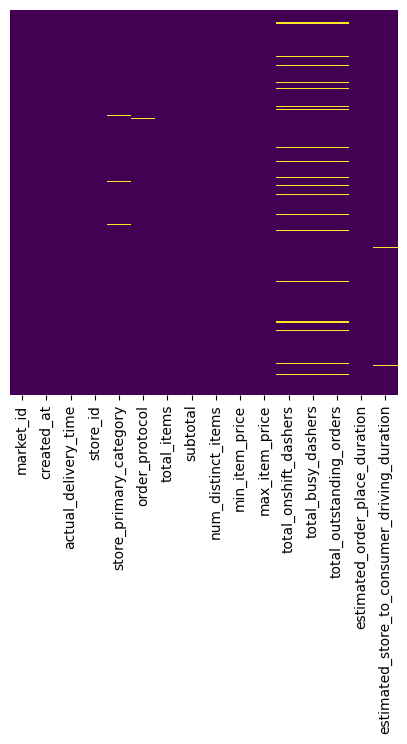

In [5]:
# checking for NA values
fig, ax = plt.subplots(figsize=(5,5))   
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df.isna().sum()

In [6]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [7]:
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_time_taken'] = df['actual_delivery_time']-df['created_at']
df['date'] = pd.to_datetime(df['actual_delivery_time']).dt.date

In [11]:

df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_taken,date
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59,2015-02-06
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04,2015-02-10
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41,2015-01-22
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15,2015-02-03
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50,2015-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,0 days 01:05:07,2015-02-17
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,0 days 00:56:23,2015-02-13
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,0 days 00:50:08,2015-01-24
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,0 days 01:05:07,2015-02-01


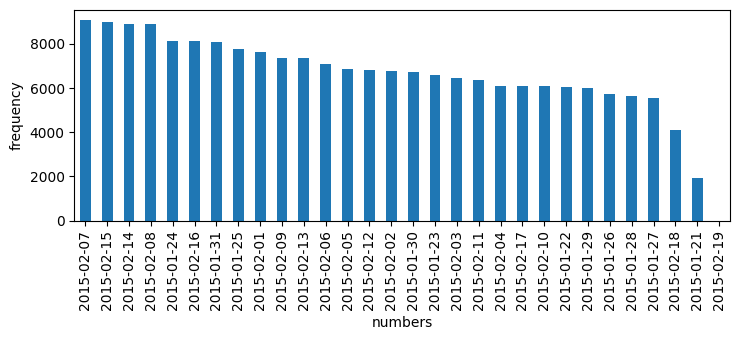

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['date'].value_counts().plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency')

plt.show()